In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
   #RK4

def rk_4_attempt(function, x, t, h):
  k1 = h*function(x,t)
  k2 = h*function(x + 1/2*k1,t + 1/2*h)
  k3 = h * function(x + 1/2 * k2, t + 1/2 * h)
  k4 = h * function (x+ k3, t + h)

  new_x = x + 1/6 * (k1 + 2*k2 + 2*k3 + k4)




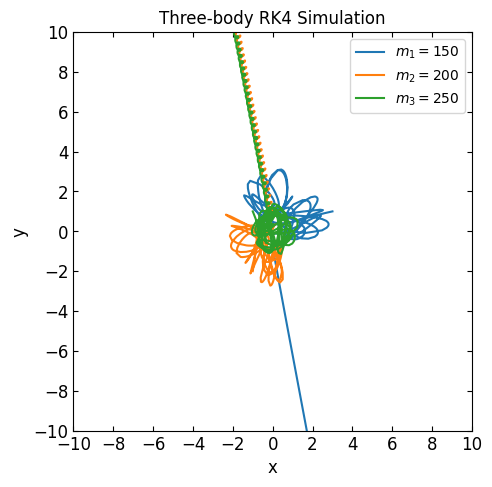

✅ Saved animation to three_body.gif


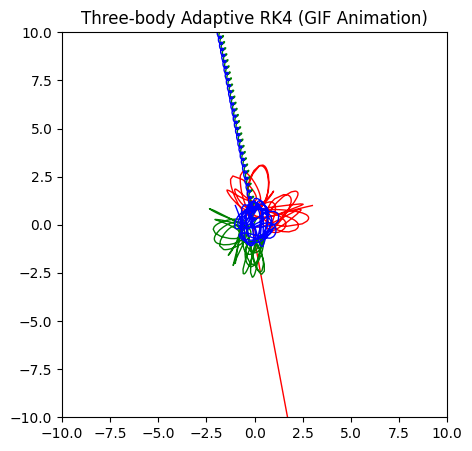

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter


def three_body_accel(r1, r2, r3, m1, m2, m3, t):
    x1, y1, vx1, vy1 = r1
    x2, y2, vx2, vy2 = r2
    x3, y3, vx3, vy3 = r3

    dx1, dy1 = vx1, vy1
    dx2, dy2 = vx2, vy2
    dx3, dy3 = vx3, vy3

    def inv_r3(dx, dy):
        return (dx*dx + dy*dy)**(-1.5)


    r21 = inv_r3(x2 - x1, y2 - y1)
    r31 = inv_r3(x3 - x1, y3 - y1)
    dvx1 = m2 * (x2 - x1) * r21 + m3 * (x3 - x1) * r31
    dvy1 = m2 * (y2 - y1) * r21 + m3 * (y3 - y1) * r31

    r12 = inv_r3(x1 - x2, y1 - y2)
    r32 = inv_r3(x3 - x2, y3 - y2)
    dvx2 = m1 * (x1 - x2) * r12 + m3 * (x3 - x2) * r32
    dvy2 = m1 * (y1 - y2) * r12 + m3 * (y3 - y2) * r32

    r13 = inv_r3(x1 - x3, y1 - y3)
    r23 = inv_r3(x2 - x3, y2 - y3)
    dvx3 = m1 * (x1 - x3) * r13 + m2 * (x2 - x3) * r23
    dvy3 = m1 * (y1 - y3) * r13 + m2 * (y2 - y3) * r23

    return (
        np.array([dx1, dy1, dvx1, dvy1], dtype=float),
        np.array([dx2, dy2, dvx2, dvy2], dtype=float),
        np.array([dx3, dy3, dvx3, dvy3], dtype=float)
    )

def rk_step_3body(r1, r2, r3, m1, m2, m3, t, h):
    k11, k21, k31 = three_body_accel(r1, r2, r3, m1, m2, m3, t)
    k12, k22, k32 = three_body_accel(r1 + 0.5*h*k11, r2 + 0.5*h*k21, r3 + 0.5*h*k31, m1, m2, m3, t + 0.5*h)
    k13, k23, k33 = three_body_accel(r1 + 0.5*h*k12, r2 + 0.5*h*k22, r3 + 0.5*h*k32, m1, m2, m3, t + 0.5*h)
    k14, k24, k34 = three_body_accel(r1 + h*k13, r2 + h*k23, r3 + h*k33, m1, m2, m3, t + h)

    r1_new = r1 + (h/6.0)*(k11 + 2*k12 + 2*k13 + k14)
    r2_new = r2 + (h/6.0)*(k21 + 2*k22 + 2*k23 + k24)
    r3_new = r3 + (h/6.0)*(k31 + 2*k32 + 2*k33 + k34)
    return r1_new, r2_new, r3_new



r1 = np.array([3, 1, 0, 0])
m1 = 150
r2 = np.array([-1, -2, 0, 0])
m2 = 200
r3 = np.array([-1, 1, 0, 0])
m3 = 250

t = 0.0
tend = 10
tol = 1e-3
h0 = 5e-3
hmin = 1e-8

xpoints1, ypoints1 = [], []
xpoints2, ypoints2 = [], []
xpoints3, ypoints3 = [], []
time = []

while t < tend:
    r1full, r2full, r3full = rk_step_3body(r1, r2, r3, m1, m2, m3, t, h0)
    r1half, r2half, r3half = rk_step_3body(r1, r2, r3, m1, m2, m3, t, 0.5*h0)
    r1second, r2second, r3second = rk_step_3body(r1half, r2half, r3half, m1, m2, m3, t + 0.5*h0, 0.5*h0)

    e1 = np.max(np.abs(r1second - r1full))
    e2 = np.max(np.abs(r2second - r2full))
    e3 = np.max(np.abs(r3second - r3full))
    error = max(e1, e2, e3)
    rho = 2.0 if error == 0.0 else (30.0 * tol / error)
    fac = min(2, rho**0.25)

    if rho > 1.0:
        t += h0
        r1, r2, r3 = r1second, r2second, r3second
        time.append(t)
        xpoints1.append(r1[0]); ypoints1.append(r1[1])
        xpoints2.append(r2[0]); ypoints2.append(r2[1])
        xpoints3.append(r3[0]); ypoints3.append(r3[1])
        h0 *= fac
    else:
        h0 = max(hmin, h0 * fac)
        if h0 <= hmin:
            print("Step size underflow – exiting.")
            break


fig, ax = plt.subplots(figsize=(5,5))
ax.plot(xpoints1, ypoints1, label=r"$m_1 = 150$")
ax.plot(xpoints2, ypoints2, label=r"$m_2 = 200$")
ax.plot(xpoints3, ypoints3, label=r"$m_3 = 250$")
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, labelsize=12)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks(np.arange(-10, 11, 2))
ax.set_yticks(np.arange(-10, 11, 2))
ax.legend()
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_title("Three-body RK4 Simulation")
plt.tight_layout()
plt.savefig("3-body-1", dpi=300)
plt.show()


fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal', adjustable='box')
ax.set_title("Three-body Adaptive RK4 (GIF Animation)")
line1, = ax.plot([], [], 'r-', lw=1)
line2, = ax.plot([], [], 'g-', lw=1)
line3, = ax.plot([], [], 'b-', lw=1)
dot1, = ax.plot([], [], 'ro', ms=6)
dot2, = ax.plot([], [], 'go', ms=6)
dot3, = ax.plot([], [], 'bo', ms=6)

def update(frame):
    line1.set_data(xpoints1[:frame], ypoints1[:frame])
    line2.set_data(xpoints2[:frame], ypoints2[:frame])
    line3.set_data(xpoints3[:frame], ypoints3[:frame])
    dot1.set_data([xpoints1[frame]], [ypoints1[frame]])
    dot2.set_data([xpoints2[frame]], [ypoints2[frame]])
    dot3.set_data([xpoints3[frame]], [ypoints3[frame]])
    return line1, line2, line3, dot1, dot2, dot3

anim = FuncAnimation(fig, update, frames=len(time), interval=30, blit=True)


writer = PillowWriter(fps=30)
anim.save("three_body.gif", writer=writer)
print(" Saved")

plt.show()


 FFmpeg not found — saved animation to three_body.gif (GIF fallback)


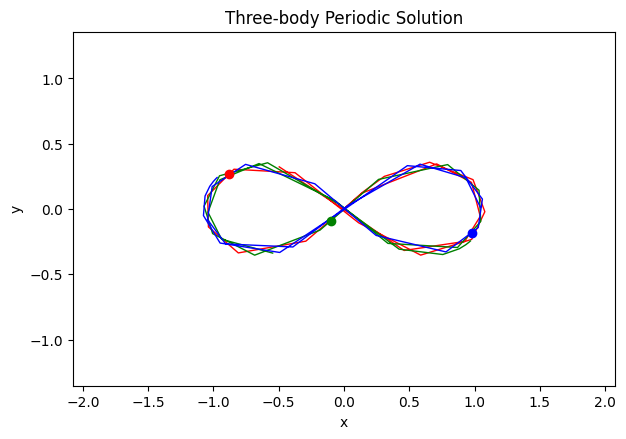

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter, PillowWriter
import shutil


def three_body_accel(r1, r2, r3, m1, m2, m3, t, eps=1e-3):
    x1, y1, vx1, vy1 = r1
    x2, y2, vx2, vy2 = r2
    x3, y3, vx3, vy3 = r3

    dx1, dy1 = vx1, vy1
    dx2, dy2 = vx2, vy2
    dx3, dy3 = vx3, vy3

    def inv_r3(dx, dy):
        return (dx*dx + dy*dy + eps*eps)**(-1.5)

    # 1 <- 2,3
    r21 = inv_r3(x2 - x1, y2 - y1)
    r31 = inv_r3(x3 - x1, y3 - y1)
    dvx1 = m2 * (x2 - x1) * r21 + m3 * (x3 - x1) * r31
    dvy1 = m2 * (y2 - y1) * r21 + m3 * (y3 - y1) * r31

    # 2 <- 1,3
    r12 = inv_r3(x1 - x2, y1 - y2)
    r32 = inv_r3(x3 - x2, y3 - y2)
    dvx2 = m1 * (x1 - x2) * r12 + m3 * (x3 - x2) * r32
    dvy2 = m1 * (y1 - y2) * r12 + m3 * (y3 - y2) * r32

    # 3 <- 1,2
    r13 = inv_r3(x1 - x3, y1 - y3)
    r23 = inv_r3(x2 - x3, y2 - y3)
    dvx3 = m1 * (x1 - x3) * r13 + m2 * (x2 - x3) * r23
    dvy3 = m1 * (y1 - y3) * r13 + m2 * (y2 - y3) * r23

    return (
        np.array([dx1, dy1, dvx1, dvy1], dtype=float),
        np.array([dx2, dy2, dvx2, dvy2], dtype=float),
        np.array([dx3, dy3, dvx3, dvy3], dtype=float)
    )


def rk_step_3body(r1, r2, r3, m1, m2, m3, t, h):
    k11, k21, k31 = three_body_accel(r1, r2, r3, m1, m2, m3, t)
    k12, k22, k32 = three_body_accel(r1 + 0.5*h*k11, r2 + 0.5*h*k21, r3 + 0.5*h*k31, m1, m2, m3, t + 0.5*h)
    k13, k23, k33 = three_body_accel(r1 + 0.5*h*k12, r2 + 0.5*h*k22, r3 + 0.5*h*k32, m1, m2, m3, t + 0.5*h)
    k14, k24, k34 = three_body_accel(r1 + h*k13, r2 + h*k23, r3 + h*k33, m1, m2, m3, t + h)

    r1_new = r1 + (h/6.0)*(k11 + 2*k12 + 2*k13 + k14)
    r2_new = r2 + (h/6.0)*(k21 + 2*k22 + 2*k23 + k24)
    r3_new = r3 + (h/6.0)*(k31 + 2*k32 + 2*k33 + k34)
    return r1_new, r2_new, r3_new


r1 = np.array([0, 0, 0.93240737, 0.86473146])
m1 = 1
r2 = np.array([0.97000436, -0.24308753, -0.46620369, -0.43236573])
m2 = 1
r3 = np.array([-0.97000436, 0.24308753, -0.46620369, -0.43236573])
m3 = 1

t, tend = 0.0, 10.0
tol, h0 = 1e-3, 5e-3
hmin, grow, shrink = 1e-8, 2.0, 0.1

x1, y1, x2, y2, x3, y3, time = [], [], [], [], [], [], []

while t < tend:
    r1full, r2full, r3full = rk_step_3body(r1, r2, r3, m1, m2, m3, t, h0)
    r1half, r2half, r3half = rk_step_3body(r1, r2, r3, m1, m2, m3, t, 0.5*h0)
    r1second, r2second, r3second = rk_step_3body(r1half, r2half, r3half, m1, m2, m3, t + 0.5*h0, 0.5*h0)

    e1, e2, e3 = np.max(np.abs(r1second - r1full)), np.max(np.abs(r2second - r2full)), np.max(np.abs(r3second - r3full))
    error = max(e1, e2, e3)
    rho = 2.0 if error == 0.0 else (30.0 * tol / error)
    fac = np.clip(rho**0.25, shrink, grow)

    if rho > 1.0:
        t += h0
        r1, r2, r3 = r1second, r2second, r3second
        h0 *= fac
        x1.append(r1[0]); y1.append(r1[1])
        x2.append(r2[0]); y2.append(r2[1])
        x3.append(r3[0]); y3.append(r3[1])
        time.append(t)
    else:
        h0 = max(hmin, h0 * fac)
        if h0 <= hmin:
            break


fig, ax = plt.subplots(figsize=(7,7))
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(min(x1+x2+x3)-1, max(x1+x2+x3)+1)
ax.set_ylim(min(y1+y2+y3)-1, max(y1+y2+y3)+1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Three-body Periodic Solution")

trail_len = 150
line1, = ax.plot([], [], 'r-', lw=1)
line2, = ax.plot([], [], 'g-', lw=1)
line3, = ax.plot([], [], 'b-', lw=1)
dot1, = ax.plot([], [], 'ro', ms=6)
dot2, = ax.plot([], [], 'go', ms=6)
dot3, = ax.plot([], [], 'bo', ms=6)

frame_count = len(time)

def update(frame):
    i_start = max(0, frame - trail_len)
    line1.set_data(x1[i_start:frame], y1[i_start:frame])
    line2.set_data(x2[i_start:frame], y2[i_start:frame])
    line3.set_data(x3[i_start:frame], y3[i_start:frame])
    dot1.set_data([x1[frame]], [y1[frame]])
    dot2.set_data([x2[frame]], [y2[frame]])
    dot3.set_data([x3[frame]], [y3[frame]])
    return line1, line2, line3, dot1, dot2, dot3

anim = FuncAnimation(fig, update, frames=frame_count, interval=30, blit=True, repeat=True)




writer = PillowWriter(fps=30)
anim.save("three_body-periodic2.gif", writer=writer)
print(" FFmpeg not found — saved animation to three_body.gif (GIF fallback)")

plt.show()




min r = 1.2500029178901253e-07
orbits = 10  t_end = 22.358289817189025  accepted/attempted steps ~ 8458


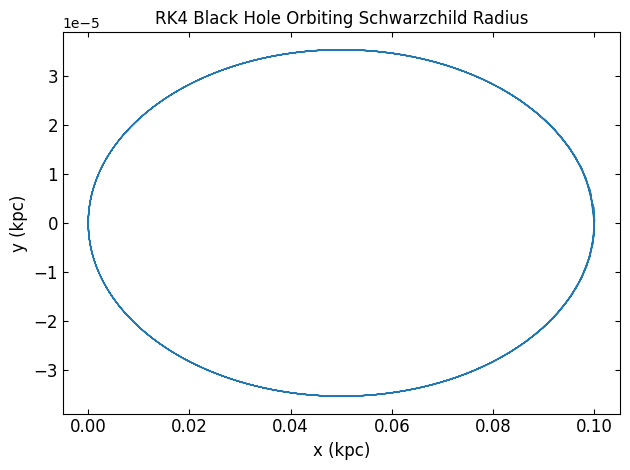

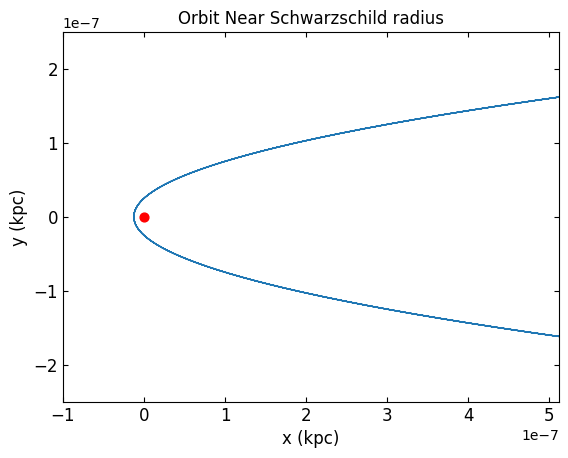

In [56]:
import math
import numpy as np
import matplotlib.pyplot as plt


USE_NUMBA = True
try:
    if USE_NUMBA:
        from numba import njit
    else:
        def njit(*args, **kwargs):
            def wrap(f): return f
            return wrap
except Exception:
    def njit(*args, **kwargs):
        def wrap(f): return f
        return wrap
    USE_NUMBA = False


@njit(fastmath=True)
def accel(x: float, y: float):

    r2 = x*x + y*y
    inv_r = 1.0 / math.sqrt(r2)
    inv_r3 = inv_r * inv_r * inv_r
    c = -0.25 * inv_r3

    return c * x, c * y

@njit(fastmath=True)
def rk4_step(x, y, vx, vy, h):

    ax1, ay1 = accel(x, y)
    k1x, k1y = vx,   vy
    k1vx, k1vy = ax1, ay1


    x2  = x  + 0.5 * h * k1x
    y2  = y  + 0.5 * h * k1y
    vx2 = vx + 0.5 * h * k1vx
    vy2 = vy + 0.5 * h * k1vy
    ax2, ay2 = accel(x2, y2)
    k2x, k2y = vx2, vy2
    k2vx, k2vy = ax2, ay2


    x3  = x  + 0.5 * h * k2x
    y3  = y  + 0.5 * h * k2y
    vx3 = vx + 0.5 * h * k2vx
    vy3 = vy + 0.5 * h * k2vy
    ax3, ay3 = accel(x3, y3)
    k3x, k3y = vx3, vy3
    k3vx, k3vy = ax3, ay3


    x4  = x  + h * k3x
    y4  = y  + h * k3y
    vx4 = vx + h * k3vx
    vy4 = vy + h * k3vy
    ax4, ay4 = accel(x4, y4)
    k4x, k4y = vx4, vy4
    k4vx, k4vy = ax4, ay4

    sixth = 1.0 / 6.0
    x_new  = x  + h * sixth * (k1x  + 2.0*k2x  + 2.0*k3x  + k4x)
    y_new  = y  + h * sixth * (k1y  + 2.0*k2y  + 2.0*k3y  + k4y)
    vx_new = vx + h * sixth * (k1vx + 2.0*k2vx + 2.0*k3vx + k4vx)
    vy_new = vy + h * sixth * (k1vy + 2.0*k2vy + 2.0*k3vy + k4vy)
    return x_new, y_new, vx_new, vy_new

@njit(fastmath=True)
def simulate(
    x0, y0, vx0, vy0,
    h0=1.0,
    tol=1e-7,
    max_orbits=10,
    max_steps=2_000_000,
    sample_every=1
):

    xs = np.empty(max_steps // sample_every + 10, dtype=np.float64)
    ys = np.empty_like(xs)

    x, y, vx, vy = x0, y0, vx0, vy0
    oldy = y
    orbits = 0
    h = h0
    t = 0.0
    min_r = math.sqrt(x*x + y*y)
    safety = 0.9
    fac_min, fac_max = 0.2, 5.0

    out_idx = 0
    step_count = 0

    while orbits < max_orbits and step_count < max_steps:

        if step_count % sample_every == 0:
            xs[out_idx] = x
            ys[out_idx] = y
            out_idx += 1


        if oldy * y < 0.0:
            orbits += 1
        oldy = y


        xh, yh, vxh, vyh = rk4_step(x, y, vx, vy, 0.5*h)
        xhh, yhh, vxhh, vyhh = rk4_step(xh, yh, vxh, vyh, 0.5*h)


        xf, yf, vxf, vyf = rk4_step(x, y, vx, vy, h)


        ex = abs(xhh - xf)
        ey = abs(yhh - yf)
        evx = abs(vxhh - vxf)
        evy = abs(vyhh - vyf)
        err = ex
        if ey  > err: err  = ey
        if evx > err: err = evx
        if evy > err: err = evy

        if err == 0.0:
            fac = 2.0
            accept = True
        else:

            fac =  (tol / err) ** 0.25
            accept = fac >= 1.0

        if accept:

            x, y, vx, vy = xhh, yhh, vxhh, vyhh
            t += h

            if fac < fac_min: fac_eff = fac_min
            elif fac > fac_max: fac_eff = fac_max
            else: fac_eff = fac
            h *= fac_eff
            if h < 1e-12:
                h = 1e-12
        else:

            if fac < fac_min: fac_eff = fac_min
            elif fac > 1.0: fac_eff = 1.0
            else: fac_eff = fac
            h *= fac_eff
            if h < 1e-12:
                h = 1e-12
            step_count += 1
            continue


        rnow = math.hypot(x, y)
        if rnow < min_r:
            min_r = rnow

        step_count += 1

    return xs[:out_idx], ys[:out_idx], min_r, orbits, t, step_count



x0, y0 = 1.0, 0.0
vx0, vy0 = 0.0, 0.00025


xs, ys, minr, orbits, tf, steps = simulate(
    x0, y0, vx0, vy0,
    h0=1,
    tol=1e-7,
    max_orbits=10,
    max_steps=2_000_000,
    sample_every=1
)

print("min r =", minr)
print("orbits =", orbits, " t_end =", tf, " accepted/attempted steps ", steps)
plt.figure()
plt.plot(xs*0.1, ys*0.1, lw=0.9)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.xlabel("x (kpc)",fontsize = 12)
plt.ylabel("y (kpc)",fontsize = 12)
plt.title("RK4 Black Hole Orbiting Schwarzchild Radius")
plt.tight_layout()
plt.savefig("orbit1")
plt.show()

plt.plot(xs*0.1, ys*0.1, lw=0.9)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.scatter(0, 0, color='red', s=40, zorder=5, label='Origin')
plt.xlim(-1*10**(-7),5**(-9))
plt.ylim(-0.00000025,0.00000025)
plt.xlabel("x (kpc)",fontsize = 12)
plt.ylabel("y (kpc)",fontsize = 12)
plt.title("Orbit Near Schwarzschild radius")
plt.savefig("orbitzoom")
plt.show()


min r = 9.992388544653012e-08
orbits = 61  t_end = 10.75617055860962  accepted/attempted steps ~ 38581


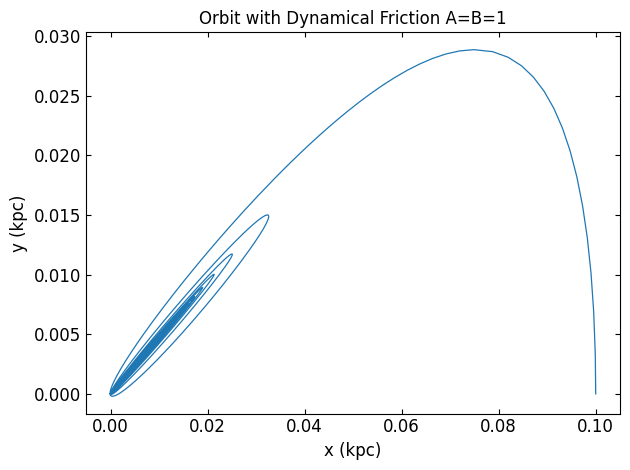

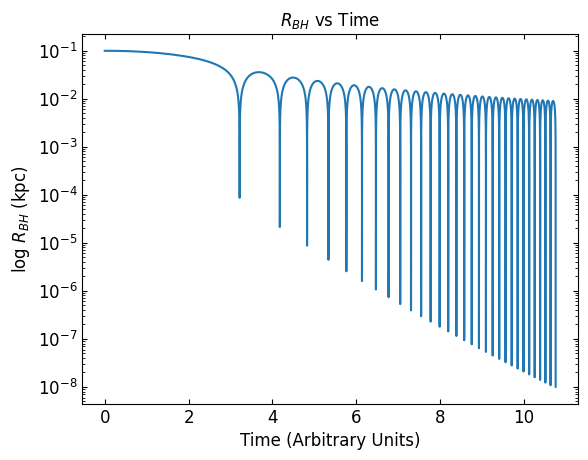

In [59]:
import math
import numpy as np
import matplotlib.pyplot as plt


USE_NUMBA = True
try:
    if USE_NUMBA:
        from numba import njit
    else:
        def njit(*args, **kwargs):
            def wrap(f): return f
            return wrap
except Exception:
    def njit(*args, **kwargs):
        def wrap(f): return f
        return wrap
    USE_NUMBA = False


@njit(fastmath=True)
def accel(x: float, y: float, vx:float, vy:float):

    r2 = x*x + y*y
    inv_r = 1.0 / math.sqrt(r2)
    inv_r3 = inv_r * inv_r * inv_r
    c = -0.25 * inv_r3
    v2 = vy*vy + vx*vx
    dv =(1/(1 + v2**(3/2)))

    return c * x - dv*vx, c * y - dv*vy

@njit(fastmath=True)
def rk4_step(x, y, vx, vy, h):

    ax1, ay1 = accel(x, y, vx, vy)
    k1x, k1y = vx,   vy
    k1vx, k1vy = ax1, ay1


    x2  = x  + 0.5 * h * k1x
    y2  = y  + 0.5 * h * k1y
    vx2 = vx + 0.5 * h * k1vx
    vy2 = vy + 0.5 * h * k1vy
    ax2, ay2 = accel(x2, y2, vx2, vy2)
    k2x, k2y = vx2, vy2
    k2vx, k2vy = ax2, ay2

    x3  = x  + 0.5 * h * k2x
    y3  = y  + 0.5 * h * k2y
    vx3 = vx + 0.5 * h * k2vx
    vy3 = vy + 0.5 * h * k2vy
    ax3, ay3 = accel(x3, y3, vx3, vy3)
    k3x, k3y = vx3, vy3
    k3vx, k3vy = ax3, ay3


    x4  = x  + h * k3x
    y4  = y  + h * k3y
    vx4 = vx + h * k3vx
    vy4 = vy + h * k3vy
    ax4, ay4 = accel(x4, y4 ,vx4, vy4)
    k4x, k4y = vx4, vy4
    k4vx, k4vy = ax4, ay4

    sixth = 1.0 / 6.0
    x_new  = x  + h * sixth * (k1x  + 2.0*k2x  + 2.0*k3x  + k4x)
    y_new  = y  + h * sixth * (k1y  + 2.0*k2y  + 2.0*k3y  + k4y)
    vx_new = vx + h * sixth * (k1vx + 2.0*k2vx + 2.0*k3vx + k4vx)
    vy_new = vy + h * sixth * (k1vy + 2.0*k2vy + 2.0*k3vy + k4vy)
    return x_new, y_new, vx_new, vy_new

@njit(fastmath=True)
def simulate(
    x0, y0, vx0, vy0,
    h0=1.0,
    tol=1e-7,
    max_orbits=10,
    max_steps=2_000_000,
    sample_every=1
):

    xs = np.empty(max_steps // sample_every + 10, dtype=np.float64)
    ys = np.empty_like(xs)
    rs = np.empty_like(xs)
    ts = np.empty_like(xs)

    x, y, vx, vy = x0, y0, vx0, vy0
    oldy = y
    orbits = 0
    h = h0
    t = 0.0
    min_r = math.sqrt(x*x + y*y)
    safety = 0.9
    fac_min, fac_max = 0.2, 5.0

    out_idx = 0
    step_count = 0
    r_stop = 10**(-7)
    while math.hypot(x, y) > r_stop and step_count < max_steps:

        if step_count % sample_every == 0:
            xs[out_idx] = x
            ys[out_idx] = y
            rs[out_idx] = math.hypot(x, y)
            ts[out_idx] = t
            out_idx += 1


        if oldy * y < 0.0:
            orbits += 1
        oldy = y


        xh, yh, vxh, vyh = rk4_step(x, y, vx, vy, 0.5*h)
        xhh, yhh, vxhh, vyhh = rk4_step(xh, yh, vxh, vyh, 0.5*h)


        xf, yf, vxf, vyf = rk4_step(x, y, vx, vy, h)


        ex = abs(xhh - xf)
        ey = abs(yhh - yf)
        evx = abs(vxhh - vxf)
        evy = abs(vyhh - vyf)
        err = ex
        if ey  > err: err  = ey
        if evx > err: err = evx
        if evy > err: err = evy


        if err == 0.0:
            fac = 2.0
            accept = True
        else:
            fac = safety * (tol / err) ** 0.25
            accept = fac >= 1.0

        if accept:

            x, y, vx, vy = xhh, yhh, vxhh, vyhh
            t += h

            if fac < fac_min: fac_eff = fac_min
            elif fac > fac_max: fac_eff = fac_max
            else: fac_eff = fac
            h *= fac_eff
            if h < 1e-12:
                h = 1e-12
        else:

            if fac < fac_min: fac_eff = fac_min
            elif fac > 1.0: fac_eff = 1.0
            else: fac_eff = fac
            h *= fac_eff
            if h < 1e-12:
                h = 1e-12
            step_count += 1
            continue


        rnow = math.hypot(x, y)
        if rnow < min_r:
            min_r = rnow

        step_count += 1


    return xs[:out_idx], ys[:out_idx], rs[:out_idx], ts[:out_idx], min_r, orbits, t, step_count


x0, y0 = 1.0, 0.0
vx0, vy0 = 0.0, 0.5*0.8


xs, ys, rs, ts, minr, orbits, tf, steps = simulate(
    x0, y0, vx0, vy0,
    h0=1,
    tol=1e-7,
    max_orbits=10,
    max_steps=2_000_000,
    sample_every=1
)

print("min r =", minr)
print("orbits =", orbits, " t_end =", tf, " accepted/attempted steps ", steps)

plt.figure()
plt.plot(xs*0.1, ys*0.1, lw=0.9)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.xlabel("x (kpc)",fontsize = 12)
plt.ylabel("y (kpc)",fontsize = 12)
plt.title("Orbit with Dynamical Friction A=B=1")
plt.tight_layout()
plt.savefig("fiction-orbit1")
plt.show()

plt.semilogy(ts,rs*0.1)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.xlabel("Time (Arbitrary Units)",fontsize = 12)
plt.ylabel("log $R_{BH}$ (kpc)",fontsize = 12)
plt.title("$R_{BH}$ vs Time")
plt.savefig("friction-orbit-R")
plt.show()


min r = 9.993157214565059e-08
orbits = 105  t_end = 7.8408304906860735  accepted/attempted steps ~ 70931


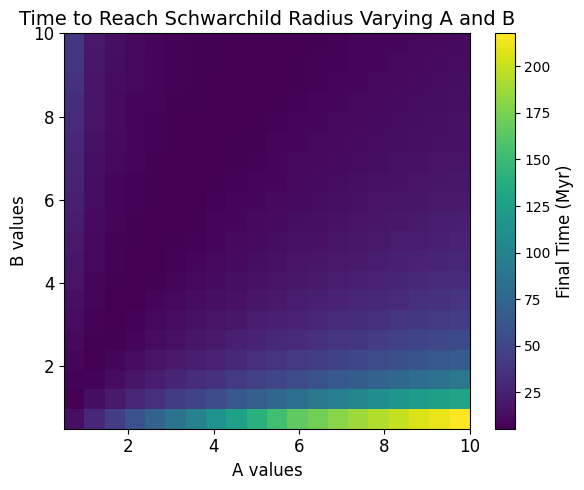

In [71]:
import math
import numpy as np
import matplotlib.pyplot as plt


USE_NUMBA = True
try:
    if USE_NUMBA:
        from numba import njit
    else:
        def njit(*args, **kwargs):
            def wrap(f): return f
            return wrap
except Exception:
    def njit(*args, **kwargs):
        def wrap(f): return f
        return wrap
    USE_NUMBA = False


@njit(fastmath=True)
def accel(x: float, y: float, vx:float, vy:float, A , B):

    r2 = x*x + y*y
    inv_r = 1.0 / math.sqrt(r2)
    inv_r3 = inv_r * inv_r * inv_r
    c = -0.25 * inv_r3
    v2 = vy*vy + vx*vx
    dv =(A/(B + v2**(3/2)))

    return c * x - dv*vx, c * y - dv*vy

@njit(fastmath=True)
def rk4_step(x, y, vx, vy, h,A,B):

    ax1, ay1 = accel(x, y, vx, vy, A,B)
    k1x, k1y = vx,   vy
    k1vx, k1vy = ax1, ay1


    x2  = x  + 0.5 * h * k1x
    y2  = y  + 0.5 * h * k1y
    vx2 = vx + 0.5 * h * k1vx
    vy2 = vy + 0.5 * h * k1vy
    ax2, ay2 = accel(x2, y2, vx2, vy2,A,B)
    k2x, k2y = vx2, vy2
    k2vx, k2vy = ax2, ay2


    x3  = x  + 0.5 * h * k2x
    y3  = y  + 0.5 * h * k2y
    vx3 = vx + 0.5 * h * k2vx
    vy3 = vy + 0.5 * h * k2vy
    ax3, ay3 = accel(x3, y3, vx3, vy3,A,B)
    k3x, k3y = vx3, vy3
    k3vx, k3vy = ax3, ay3

    x4  = x  + h * k3x
    y4  = y  + h * k3y
    vx4 = vx + h * k3vx
    vy4 = vy + h * k3vy
    ax4, ay4 = accel(x4, y4 ,vx4, vy4,A,B)
    k4x, k4y = vx4, vy4
    k4vx, k4vy = ax4, ay4

    sixth = 1.0 / 6.0
    x_new  = x  + h * sixth * (k1x  + 2.0*k2x  + 2.0*k3x  + k4x)
    y_new  = y  + h * sixth * (k1y  + 2.0*k2y  + 2.0*k3y  + k4y)
    vx_new = vx + h * sixth * (k1vx + 2.0*k2vx + 2.0*k3vx + k4vx)
    vy_new = vy + h * sixth * (k1vy + 2.0*k2vy + 2.0*k3vy + k4vy)
    return x_new, y_new, vx_new, vy_new

@njit(fastmath=True)
def simulate(
    x0, y0, vx0, vy0, A, B,
    h0=1.0,
    tol=1e-7,
    max_orbits=10,
    max_steps=2_000_000,
    sample_every=1,
):

    xs = np.empty(max_steps // sample_every + 10, dtype=np.float64)
    ys = np.empty_like(xs)
    rs = np.empty_like(xs)
    ts = np.empty_like(xs)

    x, y, vx, vy = x0, y0, vx0, vy0
    oldy = y
    orbits = 0
    h = h0
    t = 0.0
    min_r = math.sqrt(x*x + y*y)
    safety = 0.9
    fac_min, fac_max = 0.2, 5.0

    out_idx = 0
    step_count = 0
    r_stop = 10**(-7)

    A_vals = np.linspace(0.5,10,10)
    B_vals = np.linspace(0.5,10,10)

    while math.hypot(x, y) > r_stop and step_count < max_steps:

        if step_count % sample_every == 0:
            xs[out_idx] = x
            ys[out_idx] = y
            rs[out_idx] = math.hypot(x, y)
            ts[out_idx] = t
            out_idx += 1


        if oldy * y < 0.0:
            orbits += 1
        oldy = y


        xh, yh, vxh, vyh = rk4_step(x, y, vx, vy, 0.5*h,A,B)
        xhh, yhh, vxhh, vyhh = rk4_step(xh, yh, vxh, vyh, 0.5*h,A,B)

        xf, yf, vxf, vyf = rk4_step(x, y, vx, vy, h,A,B)


        ex = abs(xhh - xf)
        ey = abs(yhh - yf)
        evx = abs(vxhh - vxf)
        evy = abs(vyhh - vyf)
        err = ex
        if ey  > err: err  = ey
        if evx > err: err = evx
        if evy > err: err = evy

        if err == 0.0:
            fac = 2.0
            accept = True
        else:
            fac = safety * (tol / err) ** 0.25
            accept = fac >= 1.0

        if accept:

            x, y, vx, vy = xhh, yhh, vxhh, vyhh
            t += h

            if fac < fac_min: fac_eff = fac_min
            elif fac > fac_max: fac_eff = fac_max
            else: fac_eff = fac
            h *= fac_eff
            if h < 1e-12:
                h = 1e-12
        else:
            if fac < fac_min: fac_eff = fac_min
            elif fac > 1.0: fac_eff = 1.0
            else: fac_eff = fac
            h *= fac_eff
            if h < 1e-12:
                h = 1e-12
            step_count += 1
            continue

        rnow = math.hypot(x, y)
        if rnow < min_r:
            min_r = rnow

        step_count += 1


    return xs[:out_idx], ys[:out_idx], rs[:out_idx], ts[:out_idx], min_r, orbits, t, step_count



x0, y0 = 1.0, 0.0
vx0, vy0 = 0.0, 0.2*0.8



A_vals = np.linspace(0.5, 10, 20)
B_vals = np.linspace(0.5, 10, 20)

tf_array = np.zeros((len(A_vals), len(B_vals)))

for i, A in enumerate(A_vals):
    for j, B in enumerate(B_vals):
        xs, ys, rs, ts, minr, orbits, tf, steps = simulate(
            x0, y0, vx0, vy0,
            A, B,
            h0=1,
            tol=1e-7,
            max_orbits=10,
            max_steps=2_000_000,
            sample_every=1,
        )
        tf_array[i, j] = tf

print("min r =", minr)
print("orbits =", orbits, " t_end =", tf, " accepted/attempted steps ", steps)

T0_seconds = 4.6e13

SECONDS_PER_MYR = 3.15576e13
tf_array_myr = tf_array*T0_seconds / SECONDS_PER_MYR

plt.figure(figsize=(6, 5))
plt.imshow(
    tf_array_myr,
    origin='lower',
    aspect='auto',
    extent=[A_vals[0], A_vals[-1], B_vals[0], B_vals[-1]]
)

plt.xlabel("A values",fontsize = 12)
plt.ylabel("B values",fontsize = 12)
plt.title("Time to Reach Schwarchild Radius Varying A and B",fontsize = 14)
cbar = plt.colorbar()
cbar.set_label("Final Time (Myr)",fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig("color-map")
plt.show()


In [18]:
target_ratio = 1
tol = 1e-2

for i in range(len(A_vals)):
    for j in range(len(B_vals)):
        ratio = A_vals[i] / B_vals[j]
        if abs(ratio - target_ratio) < tol:
            print(f"A = {A_vals[i]:.3f}, B = {B_vals[j]:.3f}, A/B = {ratio:.3f}, tf (Myr) = {tf_array[i,j]:.3e}")


A = 0.500, B = 0.500, A/B = 1.000, tf (Myr) = 9.857e+00
A = 1.000, B = 1.000, A/B = 1.000, tf (Myr) = 9.163e+00
A = 1.500, B = 1.500, A/B = 1.000, tf (Myr) = 8.822e+00
A = 2.000, B = 2.000, A/B = 1.000, tf (Myr) = 8.655e+00
A = 2.500, B = 2.500, A/B = 1.000, tf (Myr) = 8.566e+00
A = 3.000, B = 3.000, A/B = 1.000, tf (Myr) = 8.437e+00
A = 3.500, B = 3.500, A/B = 1.000, tf (Myr) = 8.346e+00
A = 4.000, B = 4.000, A/B = 1.000, tf (Myr) = 8.280e+00
A = 4.500, B = 4.500, A/B = 1.000, tf (Myr) = 8.231e+00
A = 5.000, B = 5.000, A/B = 1.000, tf (Myr) = 8.136e+00
A = 5.500, B = 5.500, A/B = 1.000, tf (Myr) = 8.112e+00
A = 6.000, B = 6.000, A/B = 1.000, tf (Myr) = 8.042e+00
A = 6.500, B = 6.500, A/B = 1.000, tf (Myr) = 8.031e+00
A = 7.000, B = 7.000, A/B = 1.000, tf (Myr) = 7.977e+00
A = 7.500, B = 7.500, A/B = 1.000, tf (Myr) = 7.976e+00
A = 8.000, B = 8.000, A/B = 1.000, tf (Myr) = 7.933e+00
A = 8.500, B = 8.500, A/B = 1.000, tf (Myr) = 7.936e+00
A = 9.000, B = 9.000, A/B = 1.000, tf (Myr) = 7.